In [16]:
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
seed=7
from sklearn.metrics import classification_report

In [7]:
#charging the dateset
df = pd.read_csv('breastCancer.csv')
#showing the seven first rows
df.head(7)

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   
5  1017122                8               10                10   
6  1018099                1                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   
5                  8                7            10                9   
6                  1                2            10                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2  
5                7        1      4  
6                1        1      2

In [9]:
dataframe.shape

(699, 11)

In [10]:
dataframe.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [12]:
dataframe.describe()

id  clump_thickness  size_uniformity  shape_uniformity  \
count  6.990000e+02       699.000000       699.000000        699.000000   
mean   1.071704e+06         4.417740         3.134478          3.207439   
std    6.170957e+05         2.815741         3.051459          2.971913   
min    6.163400e+04         1.000000         1.000000          1.000000   
25%    8.706885e+05         2.000000         1.000000          1.000000   
50%    1.171710e+06         4.000000         1.000000          1.000000   
75%    1.238298e+06         6.000000         5.000000          5.000000   
max    1.345435e+07        10.000000        10.000000         10.000000   

       marginal_adhesion  epithelial_size  bland_chromatin  normal_nucleoli  \
count         699.000000       699.000000       699.000000       699.000000   
mean            2.806867         3.216023         3.437768         2.866953   
std             2.855379         2.214300         2.438364         3.053634   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000         2.000000         2.000000         1.000000   
50%             1.000000         2.000000         3.000000         1.000000   
75%             4.000000         4.000000         5.000000         4.000000   
max            10.000000        10.000000        10.000000        10.000000   

          mitoses       class  
count  699.000000  699.000000  
mean     1.589413    2.689557  
std      1.715078    0.951273  
min      1.000000    2.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      1.000000    4.000000  
max     10.000000    4.000000

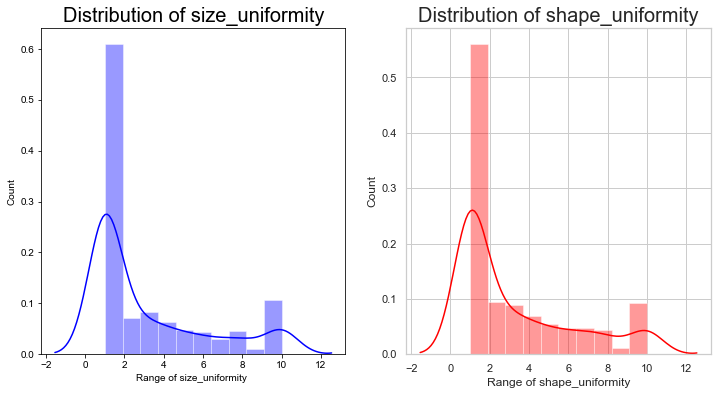

In [17]:
# so here we created two graphs one size_uniformity and the other for shape_uniformity 
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataframe['size_uniformity'], color = 'blue')
plt.title('Distribution of size_uniformity', fontsize = 20)
plt.xlabel('Range of size_uniformity ')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataframe['shape_uniformity'], color = 'red')
plt.title('Distribution of shape_uniformity', fontsize = 20)
plt.xlabel('Range of shape_uniformity')
plt.ylabel('Count')
plt.show()

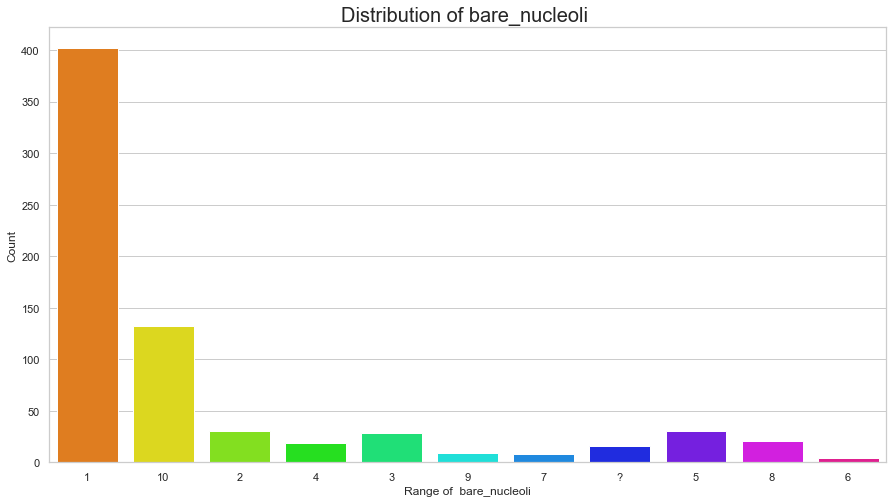

In [18]:
#so here we created a graph for bare_nucleoli
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(dataframe['bare_nucleoli'], palette = 'hsv')
plt.title('Distribution of bare_nucleoli ', fontsize = 20)
plt.xlabel('Range of  bare_nucleoli')
plt.ylabel('Count')
plt.show()

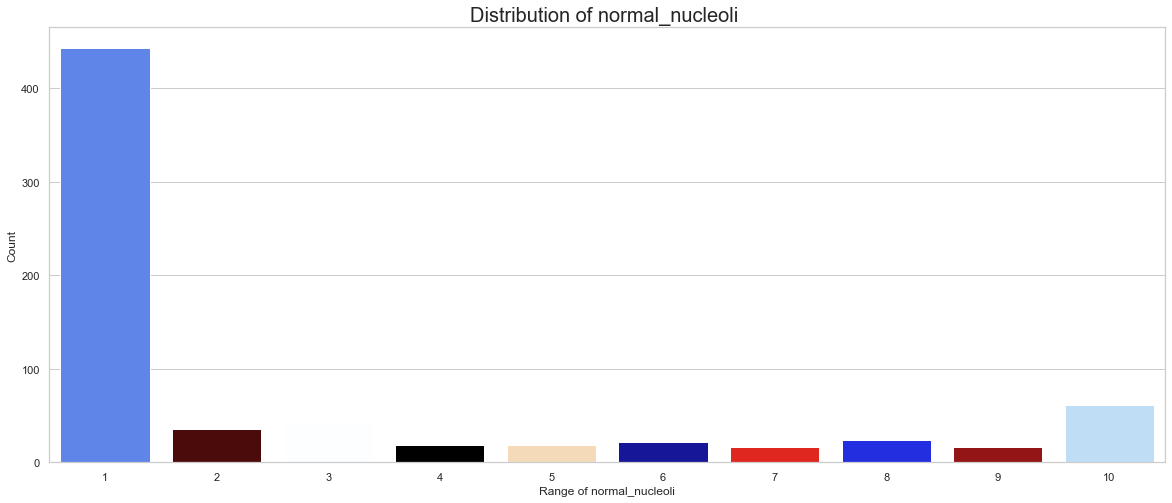

In [19]:
#here we created a graph for nucleoli
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataframe['normal_nucleoli'], palette = 'flag')
plt.title('Distribution of normal_nucleoli ', fontsize = 20)
plt.xlabel('Range of normal_nucleoli')
plt.ylabel('Count')
plt.show()

In [2]:

# i found 16 rows of "?" on the dataset thats why i used this function to fix it 
dataset = dataframe.values
dataset = dataset.astype(str)
def taking_off(data):
    dataset_2 = []
    for row in data:
        if "?" not in row:
            dataset_2.append(row)
    return dataset_2
#  so here at first Malignant was a 4 then turned it into a 1  and Benign was a 2 and i also turned it into a 0 
# because its easier to work with binary values

def to_zero_andone(data):
    for idx, val in enumerate(data):
        if str(val) == "2":
            output_x[idx] = 0 
        elif str(val) == "4":
            output_x[idx] = 1
    return data



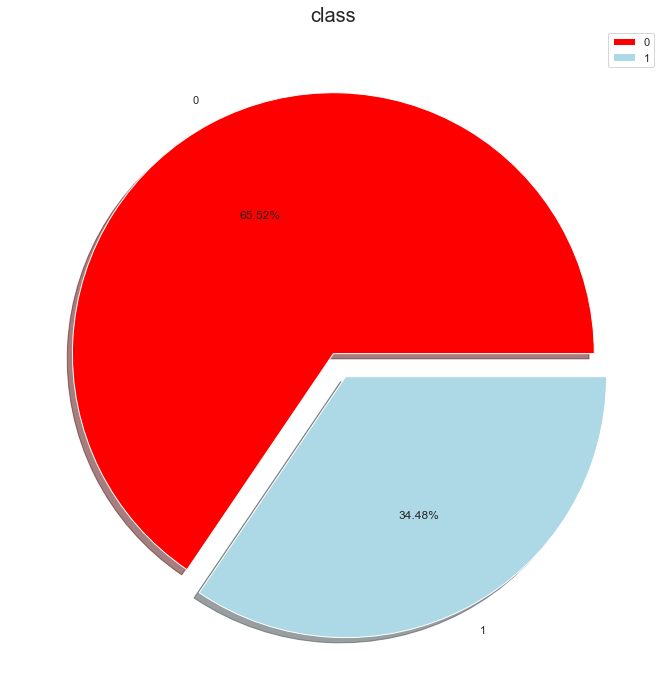

In [20]:
labels = ['0', '1']
size = dataframe['class'].value_counts()
colors = ['red', 'lightblue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (12,12)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('class', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

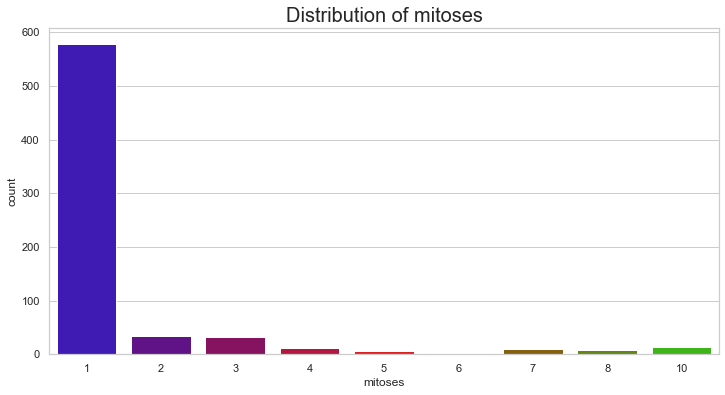

In [21]:
plt.rcParams['figure.figsize'] = (12,6)
sns.countplot(dataframe['mitoses'], palette = 'brg')
plt.title('Distribution of mitoses', fontsize = 20)
plt.show()

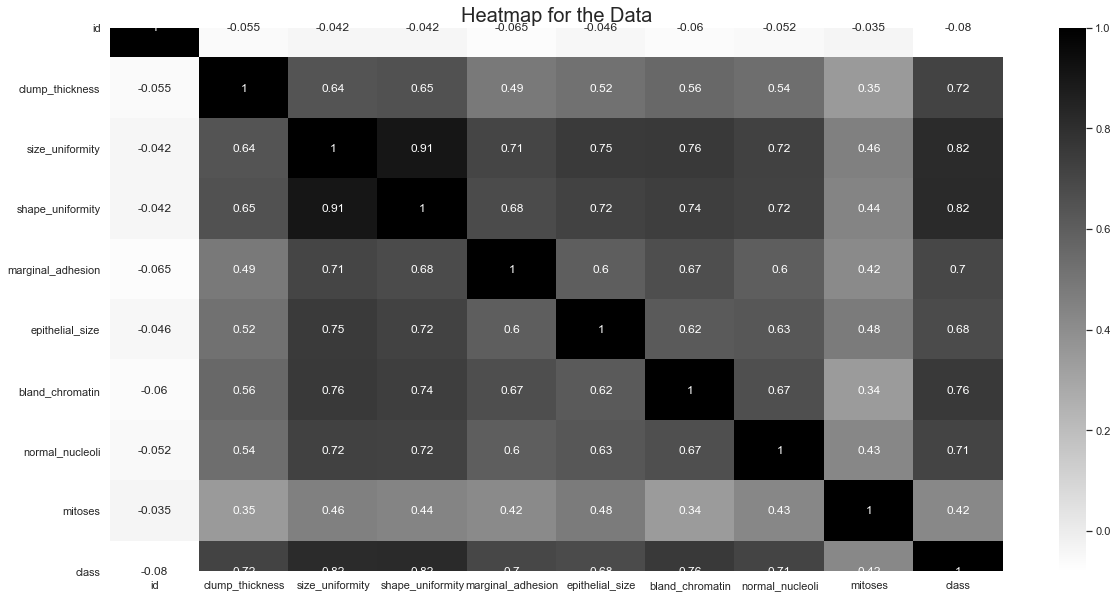

In [22]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(dataframe.corr(), cmap = 'binary', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

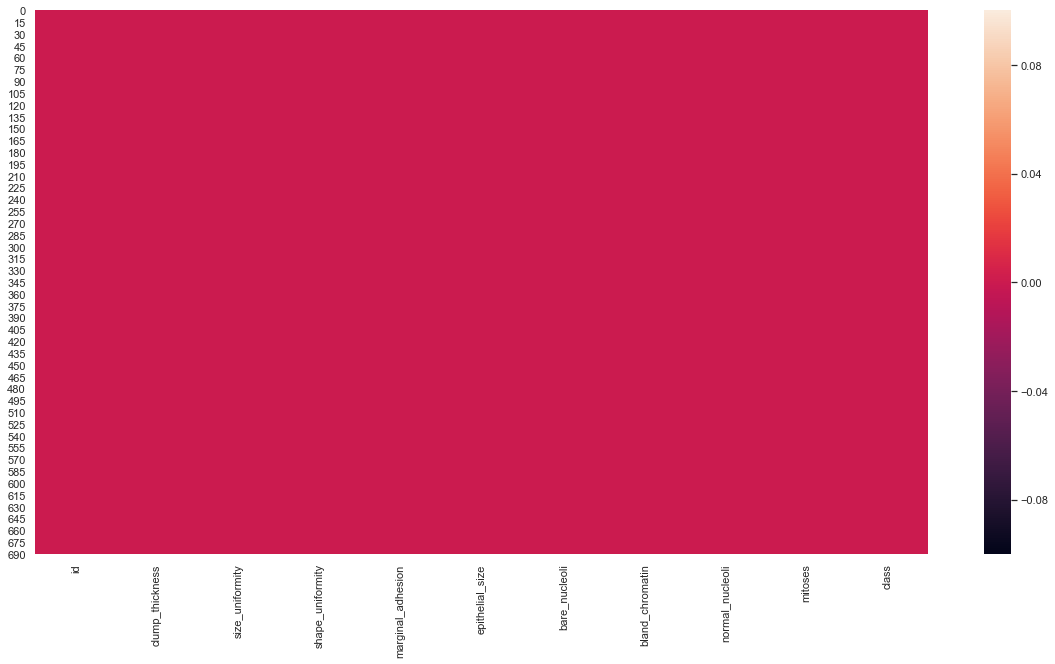

In [23]:
sns.heatmap(dataframe.isnull())
# df.isnull() is True (value =1)if null value and False (value = 0) otherwise.

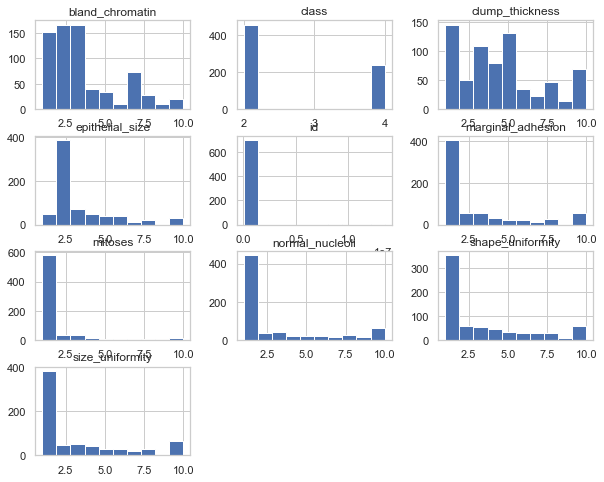

In [24]:
dataframe.hist(figsize = (10,8))
plt.show()

<Figure size 720x720 with 0 Axes>

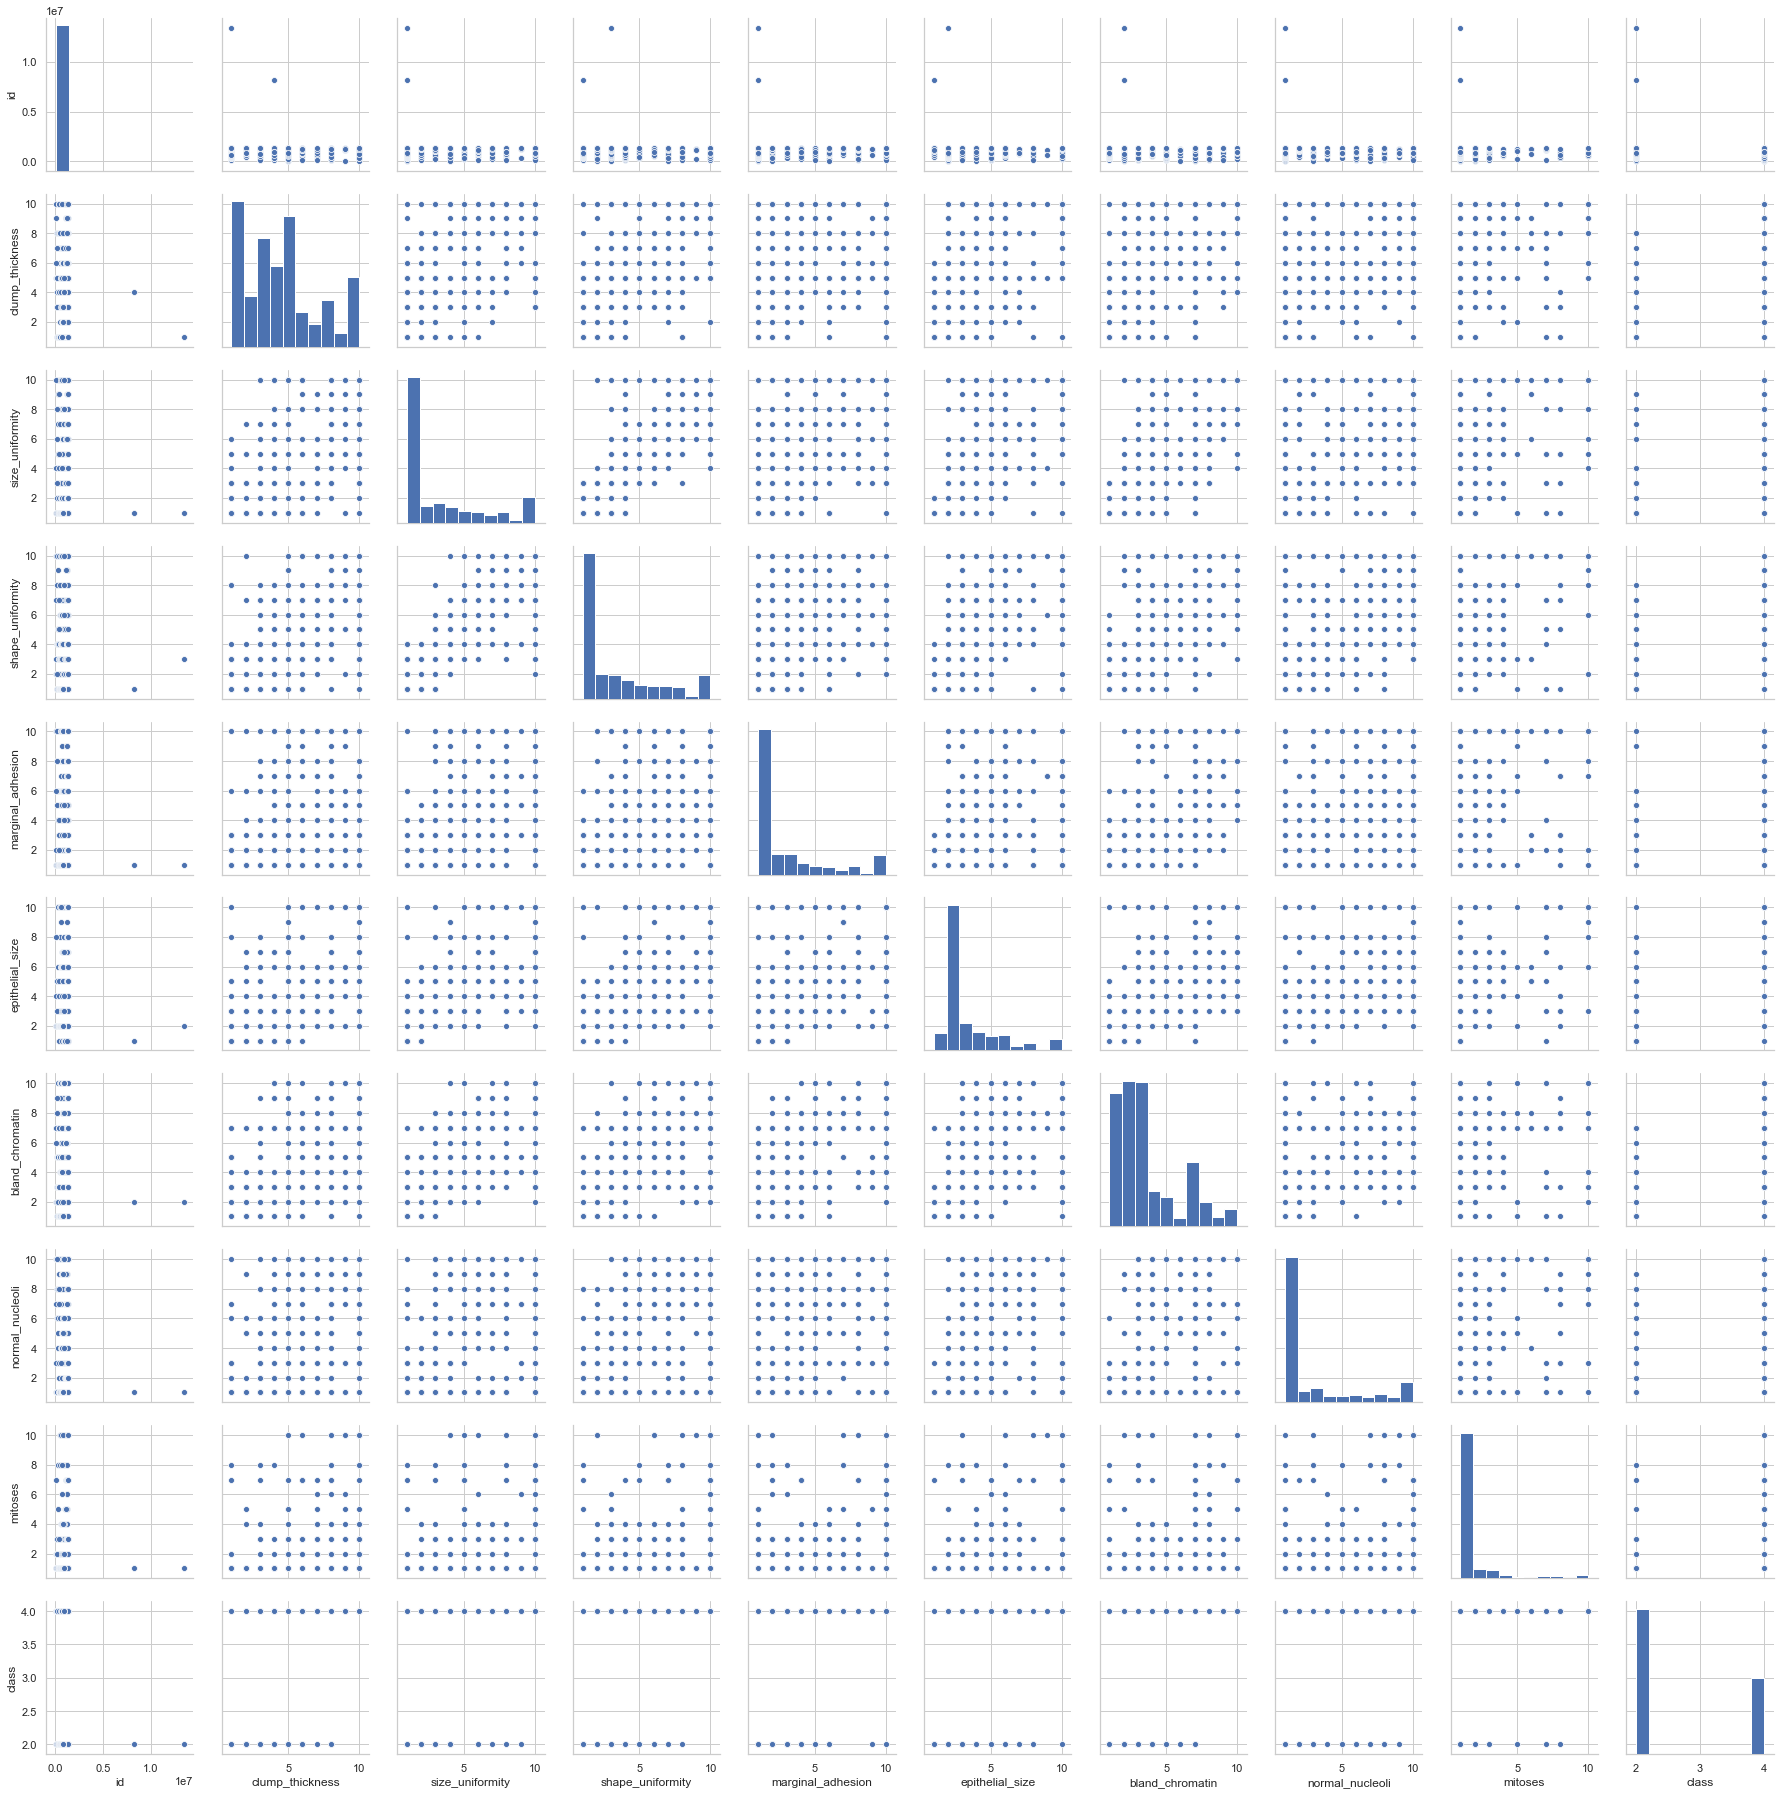

In [25]:
plt.figure(figsize = (10,10))
sns.pairplot(dataframe)

In [4]:
dataset = np.array(taking_off(dataset))
# here we uploaded every column but the first "id" (cz we wont be needing it to calculate) and the last "class"
input_x = dataset[:,1:-1]

output_x = dataset[:, -1]

output_x = to_zero_andone(output_x)
#here we use train_test_split to split the dataset to two parts 75 % for the train and 25% for the test
validation_size = 0.25
train_x, validation_x, train_y, validation_y = train_test_split(input_x , output_x, test_size=validation_size)

 # here i used MLP you may ask why well because its suitable for classification prediction problems 

 # the Keras library is a model and The simplest model is defined in the Sequentialclass which is a linear stack of Layers

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

layer_1 = 10

# ReLU is the most used activation function in the world right now;
#its a linear function that will output the input directly if is positive, otherwise, it will output zero.
function = 'relu'

#here i created Activation object and add it directly to the model 
#There are a large number of core Layer types for standard neural networks.
# here i used Dense which means Fully connected layer and the most common type of layer used on multi-layer perceptron models.
# and also Dropout which means setting a fraction of inputs to zero in an effort to reduce over fitting.
model = Sequential()
model.add(Dense(layer_1, activation=function))
model.add(Dropout(0.2))
model.add(Dense(layer_1,  activation=function))
model.add(Dropout(0.2))
model.add(Dense(layer_1,  activation=function))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
 
#so my model here is defined  now, it needs to be compiled.
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# here The model is trained on NumPy arrays using the fit() function
history = model.fit(train_x, train_y, validation_data=(validation_x, validation_y), epochs=5, batch_size=4, shuffle=True,verbose=1)
 
# now my model is trained,we can use it to make predictions on test data 
# here i used evaluate() To calculate the loss values for input data.    
score = model.evaluate(validation_x, validation_y, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 512 samples, validate on 171 samples
Epoch 1/5
512/512 [==============================] - 1s 2ms/step - loss: 1.0178 - accuracy: 0.5684 - val_loss: 0.5942 - val_accuracy: 0.7018
Epoch 2/5
512/512 [==============================] - 0s 946us/step - loss: 0.6815 - accuracy: 0.6465 - val_loss: 0.5217 - val_accuracy: 0.8480
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.6026 - accuracy: 0.73 - 0s 951us/step - loss: 0.6139 - accuracy: 0.7207 - val_loss: 0.4679 - val_accuracy: 0.8772
Epoch 4/5
512/512 [==============================] - 1s 990us/step - loss: 0.5403 - accuracy: 0.8164 - val_loss: 0.4407 - val_accuracy: 0.8830
Epoch 5/5
512/512 [==============================] - 0s 914us/step - loss: 0.4988 - accuracy: 0.8340 - val_loss: 0.3822 - val_accuracy: 0.9240
Test score: 0.3821784015635998
Test accuracy: 0.9239766001701355


In [ ]:
# so here it shows that we are going to test 171 sample 

In [5]:
#now here i tested the 171 samples to see in which class it actually belongs 
target_names = ['class 0', 'class 1']

y_predicted = model.predict(validation_x,batch_size=4, verbose=1)
i=0
for row in y_predicted:
    print(row)
    if row[0] > 0.5:
        y_predicted[i]=1
    else:
        y_predicted[i]=0
    i+=1
    
    
print(classification_report(validation_y.astype(int), y_predicted.astype(int)))

171/171 [==============================] - 0s 768us/step
[0.2705994]
[0.9456418]
[0.34192708]
[0.98055995]
[0.91138875]
[0.3111447]
[0.8924505]
[0.27853188]
[0.89393747]
[0.83111644]
[0.9648201]
[0.29855773]
[0.74922067]
[0.35915497]
[0.31416765]
[0.25618342]
[0.31416765]
[0.28948912]
[0.31936467]
[0.75476116]
[0.957193]
[0.9802357]
[0.59615296]
[0.315069]
[0.6311116]
[0.2965332]
[0.29179776]
[0.26436773]
[0.5479516]
[0.32491088]
[0.9539689]
[0.2764092]
[0.3334068]
[0.35808334]
[0.2965332]
[0.6282739]
[0.92285377]
[0.26436773]
[0.26705432]
[0.3637454]
[0.29767564]
[0.3685495]
[0.23664443]
[0.85365474]
[0.30719784]
[0.24079627]
[0.45079786]
[0.27118146]
[0.36173442]
[0.7795313]
[0.74741715]
[0.62945545]
[0.9778993]
[0.49974513]
[0.8782433]
[0.47744694]
[0.8997856]
[0.9146822]
[0.4327008]
[0.901587]
[0.93030494]
[0.31416765]
[0.43141094]
[0.2803164]
[0.29395732]
[0.30927473]
[0.29274428]
[0.3109457]
[0.30719784]
[0.28948912]
[0.29278627]
[0.9741237]
[0.29975194]
[0.94271266]
[0.26436773]

In [ ]:
# so basically we have 106 none sick person and 65 who are sick

In [28]:
predict_this = np.array([[1,1,1,1,10,1,1,1,1],[8,10,10,8,7,10,9,7,1]])
this_is = model.predict(predict_this)

print(this_is)

[[0.13436718]
 [0.9518076 ]]
